# **Penalized Logistic Regression Model, KFold**
---
##Author: Emmanuel Paalam
##Dataset has 13119 rows and 212 columns. No preprocessing
## V5: Simple imputation
##Target variable: F3EVERDO

###**Results**

*   l1/liblinear: [[2308   46]
 [ 120  150]]
*   l1/saga: [[2308   46]
 [ 120  150]]
*   l2/lbfgs: [[2307   47]
 [ 120  150]]
*   l2/liblinear: [[2306   48]
 [ 120  150]]
*   l2/newton-cg: [[2307   47]
 [ 120  150]]
*   l2/newton-cholesky: [[2307   47]
 [ 120  150]]
*   l2/sag: [[2306   48]
 [ 120  150]]
*   l2/saga: [[2306   48]
 [ 120  150]]
*   none/newton-cg: [[2305   49]
 [ 120  150]]
*   none/newton-cholesky: [[2305   49]
 [ 120  150]]
*   none/sag: [[2304   50]
 [ 120  150]]
*   none/saga: [[2304   50]
 [ 120  150]]



##Import data

In [1]:
import pandas as pd
from google.colab import drive

drive.mount("/content/drive")
## Insert pathway to dataset below
df = pd.read_csv("/content/drive/My Drive/research/SURP 2024/colab/data/processed/epaalam-SIMPLEprocessed_els_02_12_byf3pststu_v1_0.csv")

Mounted at /content/drive


In [2]:
df.dropna(inplace=True)
df.shape

(13119, 212)

## Split data

In [3]:
y = df['F3EVERDO']
y.shape

(13119,)

In [4]:
X = df.drop(columns='F3EVERDO', axis=1)
X.shape

(13119, 211)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58, stratify=y)
print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(10495, 211), (2624, 211), (10495,), (2624,)


## Make model

###Set number of folds

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=36)

###Make logistic regression model

In [28]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression(max_iter=5000, penalty='l1', solver='liblinear')

### Perform cross-validation

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Initialize lists to store metrics
acc_scores = []
ppv_scores = []
npv_scores = []
spec_scores = []
sens_scores = []
f1_scores = []
roc_auc_scores = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = model.predict(X_val_fold)

    # Calculate evaluation metrics
    acc_scores.append(accuracy_score(y_val_fold, y_val_pred))
    ppv_scores.append(precision_score(y_val_fold, y_val_pred))
    npv_scores.append(confusion_matrix(y_val_fold, y_val_pred)[0, 0] / (confusion_matrix(y_val_fold, y_val_pred)[0, 0] + confusion_matrix(y_val_fold, y_val_pred)[1, 0]))
    spec_scores.append(confusion_matrix(y_val_fold, y_val_pred)[0, 0] / (confusion_matrix(y_val_fold, y_val_pred)[0, 0] + confusion_matrix(y_val_fold, y_val_pred)[0, 1]))
    sens_scores.append(recall_score(y_val_fold, y_val_pred))
    f1_scores.append(f1_score(y_val_fold, y_val_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_pred))

# Print average evaluation metrics over all folds
print(f'Average Accuracy: {sum(acc_scores)/len(acc_scores)}')
print(f'Average Precision (PPV): {sum(ppv_scores)/len(ppv_scores)}')
print(f'Average NPV: {sum(npv_scores)/len(npv_scores)}')
print(f'Average Specificity: {sum(spec_scores)/len(spec_scores)}')
print(f'Average Sensitivity: {sum(sens_scores)/len(sens_scores)}')
print(f'Average F1-Score: {sum(f1_scores)/len(f1_scores)}')
print(f'Average ROC-AUC: {sum(roc_auc_scores)/len(roc_auc_scores)}')

Average Accuracy: 0.9358742258218198
Average Precision (PPV): 0.7677579949799395
Average NPV: 0.948962028763412
Average Specificity: 0.981322400885585
Average Sensitivity: 0.5381879286113387
Average F1-Score: 0.6324890045801467
Average ROC-AUC: 0.7597551647484618


### Predict on testing set

In [30]:
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Confusion matrix for testing data
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate specificity and negative predictive value for testing data
test_specificity = tn_test / (tn_test + fp_test)
test_npv = tn_test / (tn_test + fn_test)

# Print the evaluation metrics for testing data
print('Evaluation metrics for testing data:')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision (PPV): {test_precision}')
print(f'Test Recall (Sensitivity): {test_recall}')
print(f'Test F1-Score: {test_f1}')
print(f'Test ROC-AUC: {test_roc_auc}')
print(f'Test Specificity: {test_specificity}')
print(f'Test Negative Predictive Value (NPV): {test_npv}')

Evaluation metrics for testing data:
Test Accuracy: 0.9367378048780488
Test Precision (PPV): 0.7653061224489796
Test Recall (Sensitivity): 0.5555555555555556
Test F1-Score: 0.6437768240343348
Test ROC-AUC: 0.7680071745492306
Test Specificity: 0.9804587935429057
Test Negative Predictive Value (NPV): 0.9505766062602965


Confusion Matrix:
[[2308   46]
 [ 120  150]]


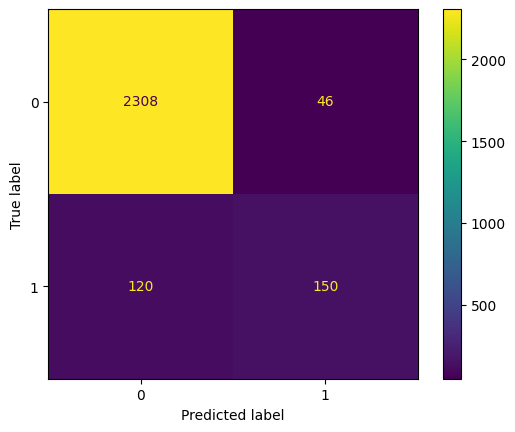

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

print("Confusion Matrix:")
print(cm)